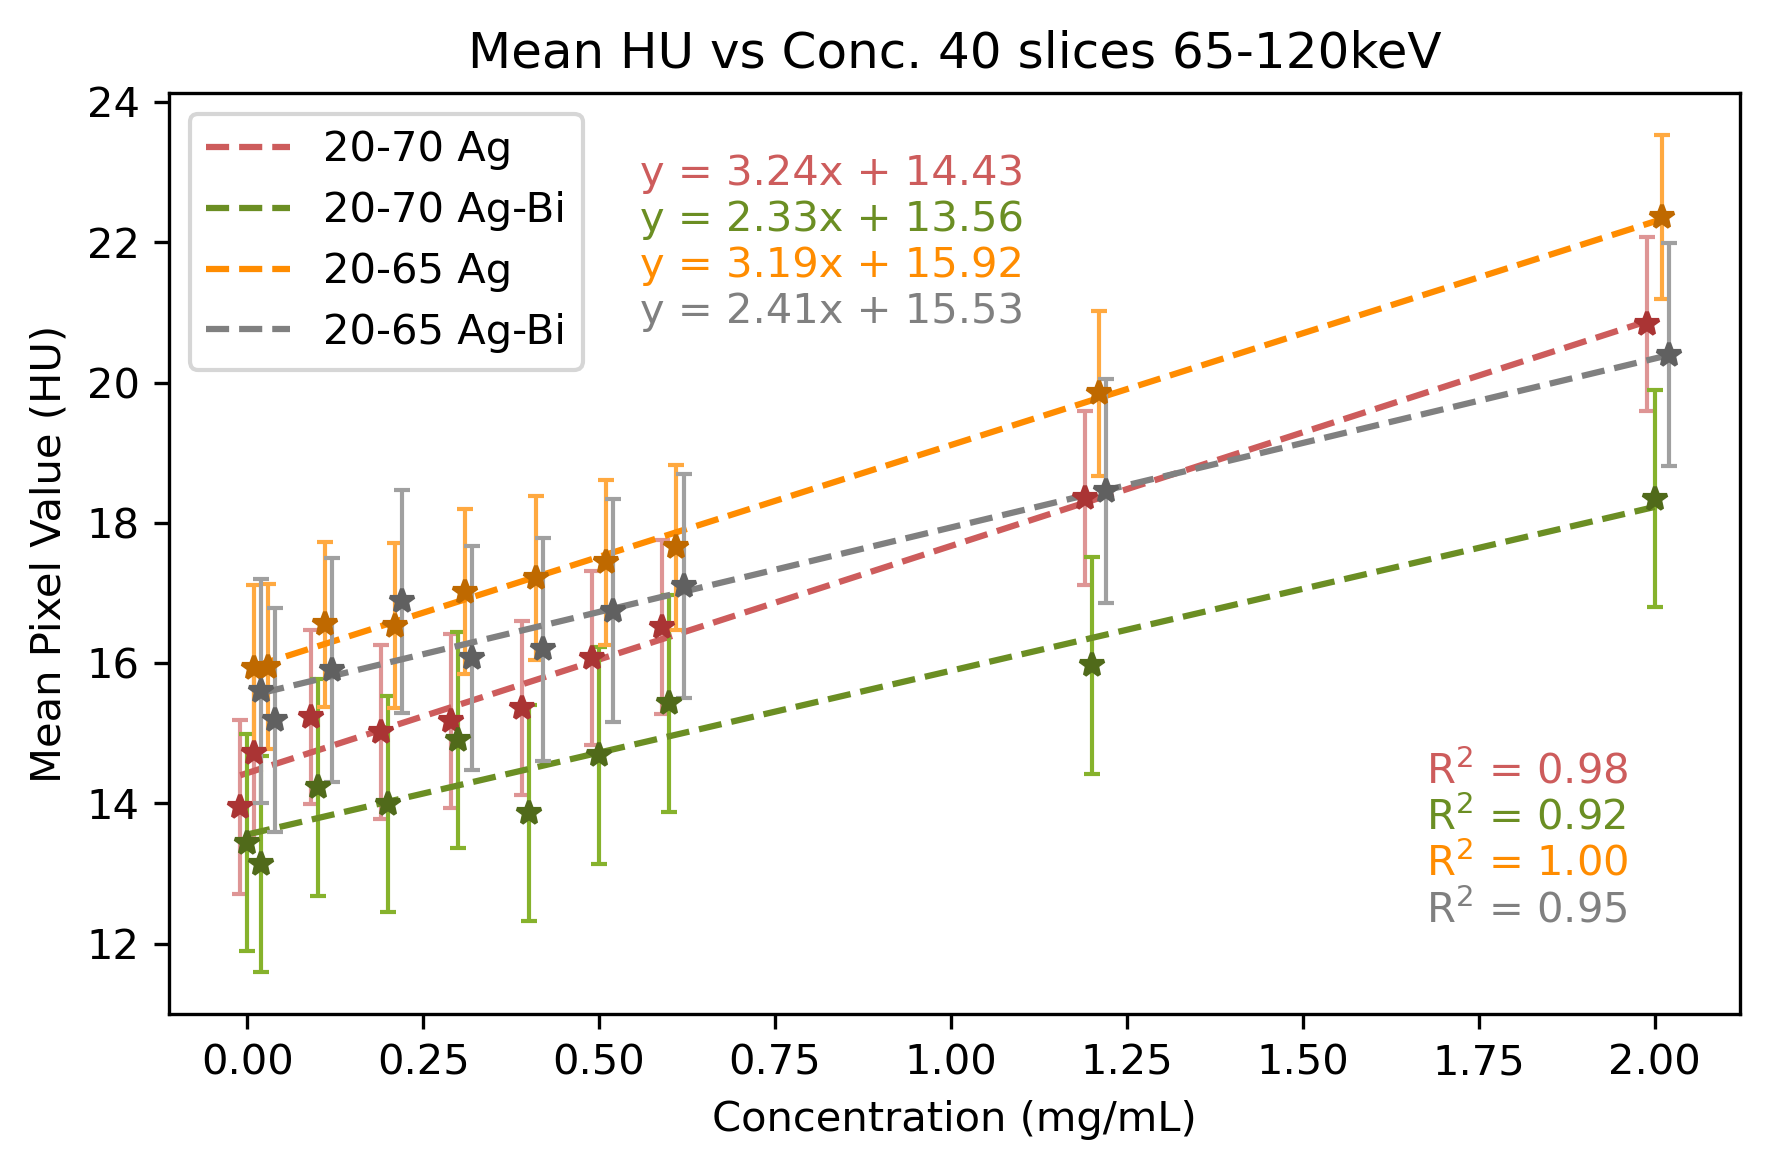

In [14]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import colorsys
import matplotlib

# Load the variables
with open('plot_data_20-70.pkl', 'rb') as f:
    mean_values, std_values, conc, colors, titles = pickle.load(f)

titles = ['20-70 ' + ti for ti in titles]
with open('plot_data_20-65.pkl', 'rb') as f:
    mean_values_20_65, std_values_20_65, conc_20_65, colors_20_65, titles_20_65 = pickle.load(f)

titles_20_65 = ['20-65 '+ti for ti in titles_20_65]
# concatenate the data  
mean_values = mean_values + mean_values_20_65
std_values = std_values + std_values_20_65
conc = conc + conc_20_65
colors = colors + colors_20_65
titles = titles + titles_20_65

# Define the function to adjust color lightness
def adjust_color_lightness(color, amount=0.5):
    try:
        c = matplotlib.colors.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*matplotlib.colors.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])

# Recreate the plot
fig, ax = plt.subplots(dpi=300,figsize=[6,4])
for ii, (mean, std) in enumerate(zip(mean_values[::2], std_values[::2])):
    mean_both = mean_values[ii*2] + mean_values[ii*2+ 1]
    std_both = std_values[ii*2] + std_values[ii*2+ 1]
    darker_color = adjust_color_lightness(colors[ii], 0.75)  # Darker red
    lighter_color = adjust_color_lightness(colors[ii], 1.25)  # Lighter red
    ax.errorbar(conc+0.01*(ii-1), mean_both, yerr=std_both, fmt='*', color=darker_color, ecolor=lighter_color,capsize=2, capthick=1,elinewidth=1)
    # Add a trend line
    z = np.polyfit(conc+0.01*(ii-1), mean_both, 1)
    p = np.poly1d(z)
    ax.plot(conc+0.01*(ii-1), p(conc+0.01*(ii-1)), "--", color=colors[ii],label=titles[ii])
    # Add the equation
    ax.text(0.3, 0.9-0.05*ii, f'y = {z[0]:.2f}x + {z[1]:.2f}', color=colors[ii], transform=ax.transAxes)
    # Add the R^2 value
    residuals = mean_both - p(conc+0.01*(ii-1))
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((mean_both - np.mean(mean_both))**2)
    r_squared = 1 - (ss_res / ss_tot)
    ax.text(0.8, 0.25-0.05*ii, f'R$^2$ = {r_squared:.2f}', color=colors[ii], transform=ax.transAxes)

plt.xlabel('Concentration (mg/mL)')
plt.ylabel('Mean Pixel Value (HU)')
plt.legend()
plt.title('Mean HU vs Conc. 40 slices 65-120keV')
plt.tight_layout()

# Save the figure
plt.savefig('40_slices_120_140_comparison.png',dpi=300)